In [15]:
# Exoplanet Detection and Characterization using NASA Kepler Data
# Case Study: Kepler-10b
# Author: Sarthak Singh
# Date: June 2025
# Tools Used: Python, Lightkurve, Box Least Squares (BLS), Matplotlib, NumPy
# Data Source: NASA Kepler Mission (via MAST)

<ipython-input-16-3124377541>:5: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  search = search_lightcurvefile("Kepler 10", mission="Kepler")
/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 50 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


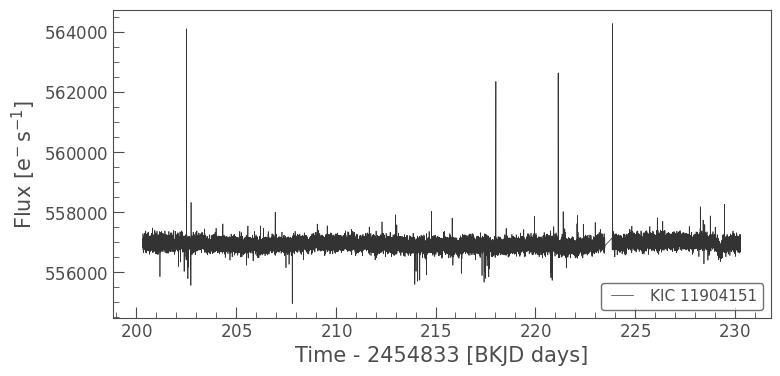

In [16]:
# DOWNLOAD AND PLOT LIGHT CURVE

!pip install lightkurve --quiet
from lightkurve import search_lightcurvefile
search = search_lightcurvefile("Kepler 10", mission="Kepler")
lcf = search.download()
lcf.plot();



<ipython-input-17-1487143007>:3: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lcf.PDCSAP_FLUX.remove_nans().normalize().flatten(window_length=401)


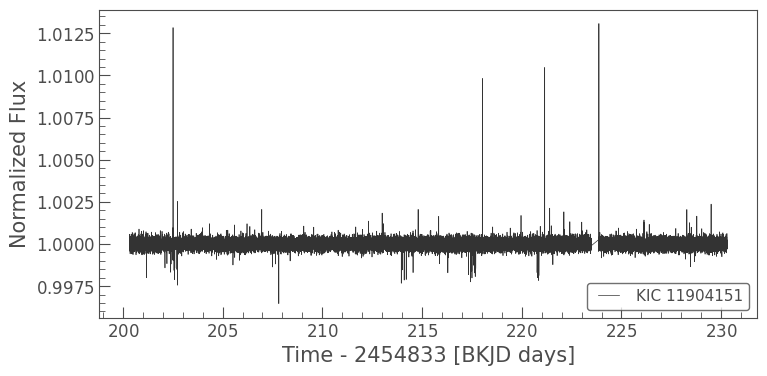

In [17]:
# CLEANING AND FLATTENING THE LIGHT CURVE

lc = lcf.PDCSAP_FLUX.remove_nans().normalize().flatten(window_length=401)
lc.plot();


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

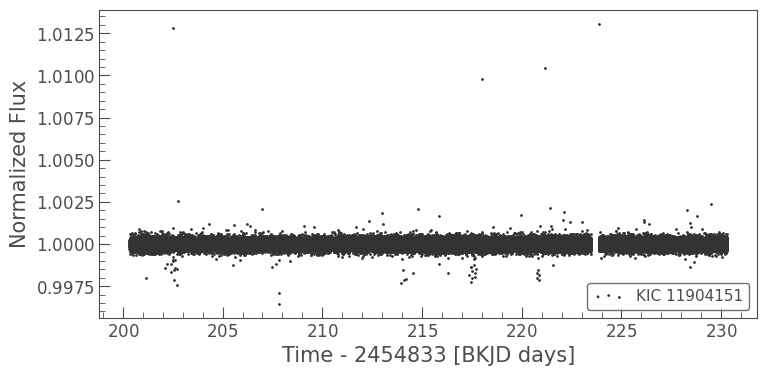

In [18]:
# SCATTERING THE DIFFERENT POINTS OF INTERACTION

lc.scatter()

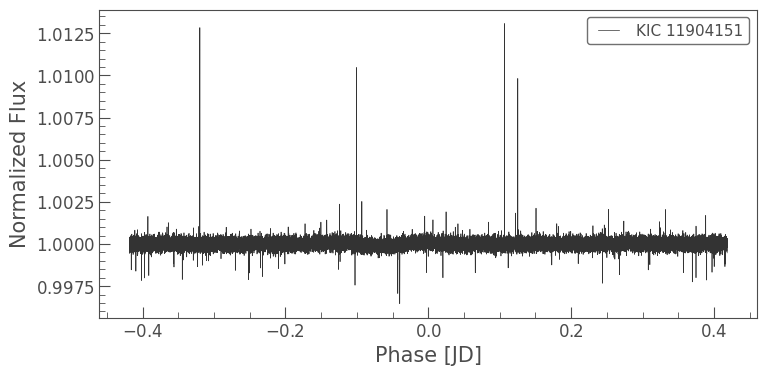

In [19]:
# FOLDING THE TRANSITS TO DETECT REPETITIONS

folded_lc = lc.fold(period=0.837)  # 0.837 is the period for KEPLER 10B
folded_lc.plot();

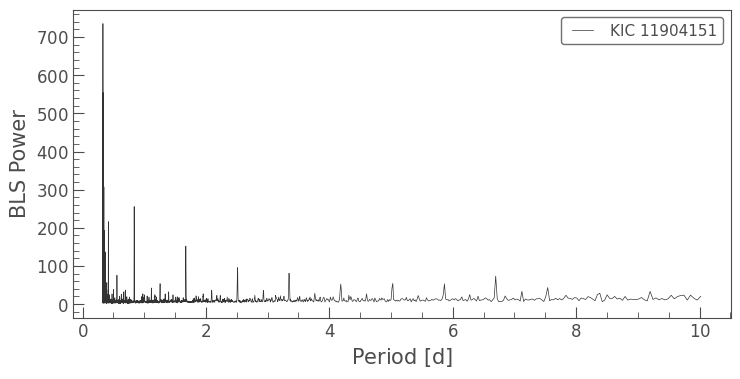

In [20]:
# GENERATING THE BLS POWER vs PERIOD GRAPH

from lightkurve.periodogram import BoxLeastSquaresPeriodogram

bls = BoxLeastSquaresPeriodogram.from_lightcurve(lc)
bls.plot();


Best Period= 0.33092467938632136 d


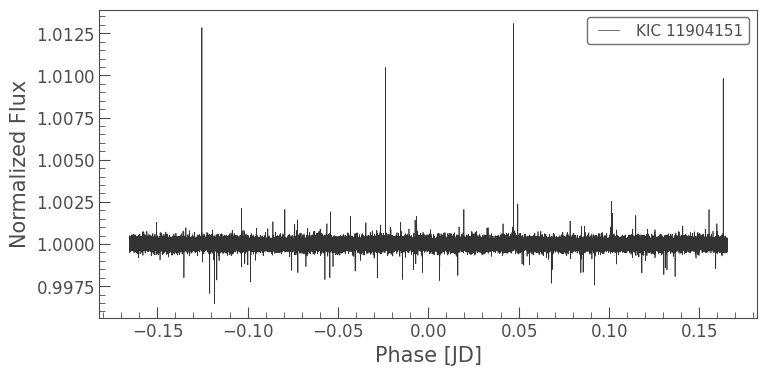

In [21]:
# IDENTIFYING THE PEAK BLS POWER

best_period = bls.period_at_max_power
folded_lc = lc.fold(period=best_period)
folded_lc.plot();

print("Best Period=",
      best_period)

Transit Depth: 0.00354 or 0.35%
Transit Duration (in phase units): 0.27188
Transit Duration (in days): 0.08997 d


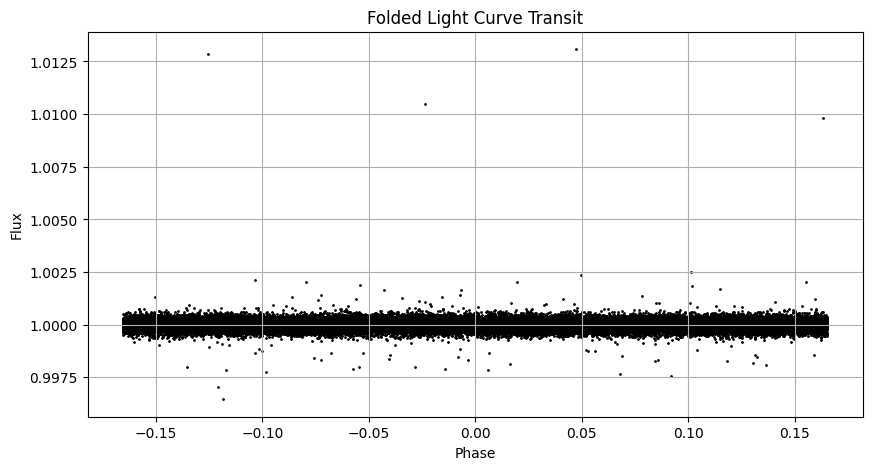

In [22]:
# CALCULATING TRANSIT DEPTH AND TRANSIT DURATION

import numpy as np
import matplotlib.pyplot as plt

phase = folded_lc.phase.value
flux = folded_lc.flux.value

plt.figure(figsize=(10, 5))
plt.scatter(phase, flux, s=1, color='black')
plt.xlabel("Phase")
plt.ylabel("Flux")
plt.title("Folded Light Curve Transit")
plt.grid(True)

min_flux = np.min(flux)
depth = 1 - min_flux
print(f"Transit Depth: {depth:.5f} or {depth*100:.2f}%")

threshold = 1 - (depth / 2)
in_transit = phase[flux < threshold]
duration = in_transit[-1] - in_transit[0]

print(f"Transit Duration (in phase units): {duration:.5f}")
print(f"Transit Duration (in days): {duration * best_period:.5f}")



In [23]:
# CALCULATING PLANET RADIUS

import numpy as np

R_sun_km = 696_340
R_earth_km = 6_371
R_star = 1.056

depth = 1 - np.min(flux)

R_planet = R_star * np.sqrt(depth)
R_planet_earth = R_planet * 109
R_planet_km = R_planet * R_sun_km

print(f"Planet Radius = {R_planet:.5f} R_sun")
print(f"Planet Radius = {R_planet_earth:.2f} Earth radii")
print(f"Planet Radius = {R_planet_km:,.2f} km")


Planet Radius = 0.06280 R_sun
Planet Radius = 6.85 Earth radii
Planet Radius = 43,732.32 km


In [24]:
# CALCULATING SEMI MAJOR AXIS

P = best_period.value
M_star = 0.913
a = ((P / 365.25)**2 * M_star) ** (1/3)

print(f"Semi-Major Axis = {a:.4f} AU")

Semi-Major Axis = 0.0091 AU


In [25]:
# CALCULATING EQUILIBRIUM TEMPERATURE

T_star = 5627
R_star_solar = 1.056
albedo = 0.3
R_sun_AU = 0.00465047

R_star_AU = R_star_solar * R_sun_AU

T_eq = T_star * np.sqrt(R_star_AU / (2 * a)) * (1 - albedo) ** 0.25

print(f"Equilibrium Temperature = {T_eq:.2f} K")

Equilibrium Temperature = 2676.04 K


In [26]:
#SUMMARY TABLE

import pandas as pd


data = {
    "Parameter": [
        "Orbital Period",
        "Transit Depth",
        "Planet Radius",
        "Semi-Major Axis",
        "Equilibrium Temperature"
    ],
    "Value": [
        f"{best_period.value:.2f} days",
       f"{depth * 100:.2f}%",
        f"{R_planet_earth:.2f} Earth radii",
        f"{a:.4f} AU",
        f"{T_eq:.2f} K"
    ]
}

df = pd.DataFrame(data)
df


,Parameter,Value
0,Orbital Period,0.33 days
1,Transit Depth,0.35%
2,Planet Radius,6.85 Earth radii
3,Semi-Major Axis,0.0091 AU
4,Equilibrium Temperature,2676.04 K


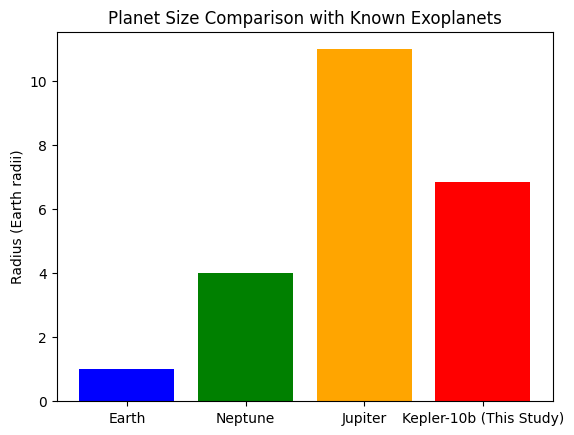

In [27]:
# PLANET SIZE COMPARISON WITH KNOWN EXOPLANETS

import matplotlib.pyplot as plt

known_radii = [1, 4, 11, 6.85]
labels = ["Earth", "Neptune", "Jupiter", "Kepler-10b (This Study)"]

plt.bar(labels, known_radii, color=["blue", "green", "orange", "red"])
plt.ylabel("Radius (Earth radii)")
plt.title("Planet Size Comparison with Known Exoplanets")
plt.show()